In [4]:
import pandas as pd

# URLs com o link direto para o CSV (raw)
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/main/base-de-dados-challenge-1/loja_4.csv"

# Leitura dos arquivos
loja1 = pd.read_csv(url1)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

# Coluna com o nome da loja
loja1["loja"] = "Loja 1"
loja2["loja"] = "Loja 2"
loja3["loja"] = "Loja 3"
loja4["loja"] = "Loja 4"

# Concatenando todas as lojas
dados = pd.concat([loja1, loja2, loja3, loja4])
dados.reset_index(drop=True, inplace=True)


In [5]:
print(dados.columns)
print(dados.info())

Index(['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra',
       'Vendedor', 'Local da compra', 'Avaliação da compra',
       'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon', 'loja'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9435 entries, 0 to 9434
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Produto                 9435 non-null   object 
 1   Categoria do Produto    9435 non-null   object 
 2   Preço                   9435 non-null   float64
 3   Frete                   9435 non-null   float64
 4   Data da Compra          9435 non-null   object 
 5   Vendedor                9435 non-null   object 
 6   Local da compra         9435 non-null   object 
 7   Avaliação da compra     9435 non-null   int64  
 8   Tipo de pagamento       9435 non-null   object 
 9   Quantidade de parcelas  9435 non-null   int64  
 10  lat           

In [6]:
# Faturamento total por loja
dados.groupby("loja")["Preço"].sum()

,Preço
loja,
Loja 1,1534509.12
Loja 2,1488459.06
Loja 3,1464025.03
Loja 4,1384497.58


In [7]:
# Ticket médio por loja
dados.groupby("loja")["Preço"].mean()

,Preço
loja,
Loja 1,650.491361
Loja 2,630.970352
Loja 3,620.612560
Loja 4,587.149101


In [8]:
# Frete médio por loja
dados.groupby("loja")["Frete"].mean()

,Frete
loja,
Loja 1,34.691805
Loja 2,33.621941
Loja 3,33.074464
Loja 4,31.278997


In [9]:
# Avaliação média por loja
dados.groupby("loja")["Avaliação da compra"].mean()

,Avaliação da compra
loja,
Loja 1,3.976685
Loja 2,4.037304
Loja 3,4.048326
Loja 4,3.995759


In [10]:
# Parcelamento médio por loja
dados.groupby("loja")["Quantidade de parcelas"].mean()

,Quantidade de parcelas
loja,
Loja 1,2.943196
Loja 2,2.902501
Loja 3,2.967783
Loja 4,2.896098


In [11]:
# Análise equipe de vendas
vendedores = dados.groupby(["loja", "Vendedor"]).agg({
    "Preço": "sum",
    "Avaliação da compra": "mean",
    "Produto": "count"
}).rename(columns={
    "Preço": "Faturamento",
    "Avaliação da compra": "Avaliação Média",
    "Produto": "Qtd de Vendas"
}).sort_values(by="Faturamento", ascending=False)


In [12]:
# Visualização melhores vendedores
vendedores.reset_index().head(10)

,loja,Vendedor,Faturamento,Avaliação Média,Qtd de Vendas
0,Loja 1,Larissa Alves,135371.44,3.884393,173
1,Loja 3,Larissa Alves,128437.43,3.951613,186
2,Loja 1,Rafael Costa,128361.90,4.070175,171
3,Loja 4,Felipe Santos,127242.35,4.015306,196
4,Loja 1,Thiago Silva,125034.74,3.751269,197
5,Loja 2,Thiago Silva,122417.21,4.000000,195
6,Loja 1,Felipe Santos,120276.36,4.041176,170
7,Loja 2,Pedro Gomes,120187.54,4.169591,171
8,Loja 2,Felipe Santos,117148.86,4.114458,166
9,Loja 2,Beatriz Moraes,116723.55,3.947059,170


In [13]:
ranking_geral_vendedores = dados.groupby("Vendedor").agg({
    "Preço": "sum",
    "Avaliação da compra": "mean",
    "Produto": "count"
}).rename(columns={
    "Preço": "Faturamento Total",
    "Avaliação da compra": "Avaliação Média",
    "Produto": "Quantidade de Vendas"
}).sort_values(by="Faturamento Total", ascending=False)

print(ranking_geral_vendedores)


                  Faturamento Total  Avaliação Média  Quantidade de Vendas
Vendedor                                                                  
Felipe Santos             471727.50         4.075606                   701
Thiago Silva              467122.90         3.858871                   744
Larissa Alves             466258.85         3.957290                   679
Juliana Costa             451153.64         3.918759                   677
Pedro Gomes               417803.49         4.041221                   655
Rafael Costa              413723.01         4.064000                   625
João Souza                411416.10         4.033141                   694
Lucas Oliveira            407203.55         3.962908                   674
Camila Ribeiro            404245.51         4.032984                   667
Beatriz Moraes            403594.08         4.047692                   650
Bianca Santos             399447.52         3.994109                   679
Isabella Pereira         

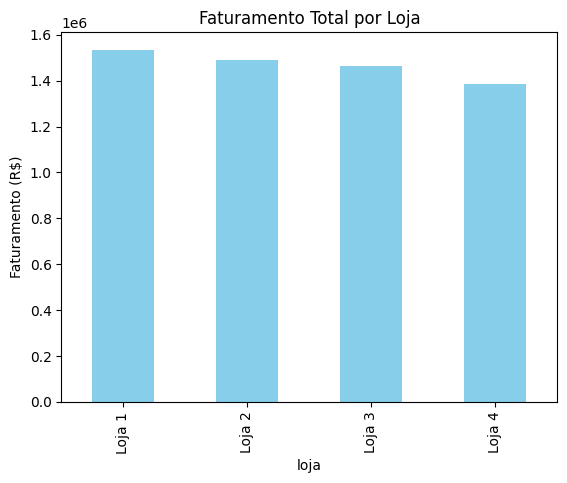

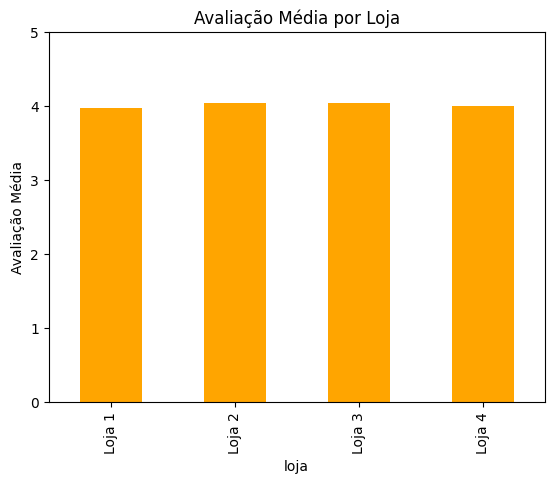

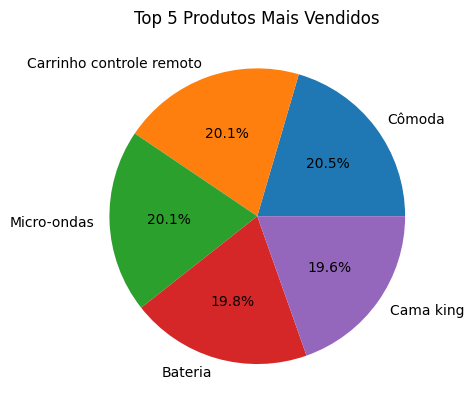

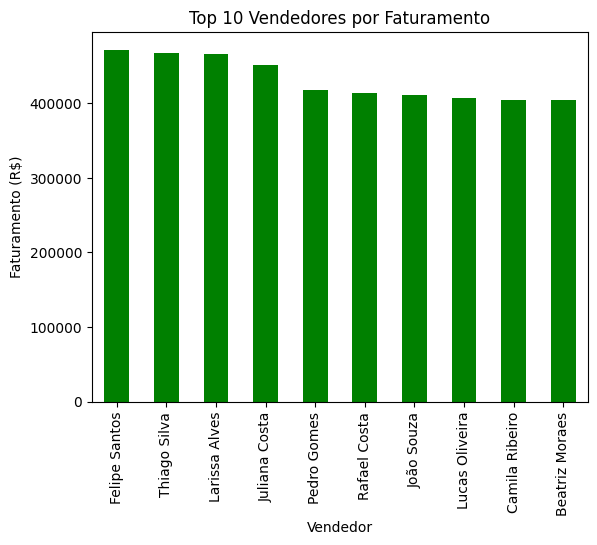

In [14]:
import matplotlib.pyplot as plt

# 1. Faturamento por loja
faturamento = dados.groupby("loja")["Preço"].sum()
faturamento.plot(kind="bar", color="skyblue", title="Faturamento Total por Loja")
plt.ylabel("Faturamento (R$)")
plt.show()

# 2. Avaliação média por loja
avaliacao = dados.groupby("loja")["Avaliação da compra"].mean()
avaliacao.plot(kind="bar", color="orange", title="Avaliação Média por Loja")
plt.ylabel("Avaliação Média")
plt.ylim(0, 5)
plt.show()

# 3. Top 5 produtos mais vendidos (em toda a rede)
produtos_top = dados["Produto"].value_counts().head(5)
produtos_top.plot(kind="pie", autopct="%1.1f%%", title="Top 5 Produtos Mais Vendidos")
plt.ylabel("")
plt.show()

# 4. Top 10 vendedores por faturamento
vendedores_faturamento = dados.groupby("Vendedor")["Preço"].sum().sort_values(ascending=False).head(10)
vendedores_faturamento.plot(kind="bar", color="green", title="Top 10 Vendedores por Faturamento")
plt.ylabel("Faturamento (R$)")
plt.show()


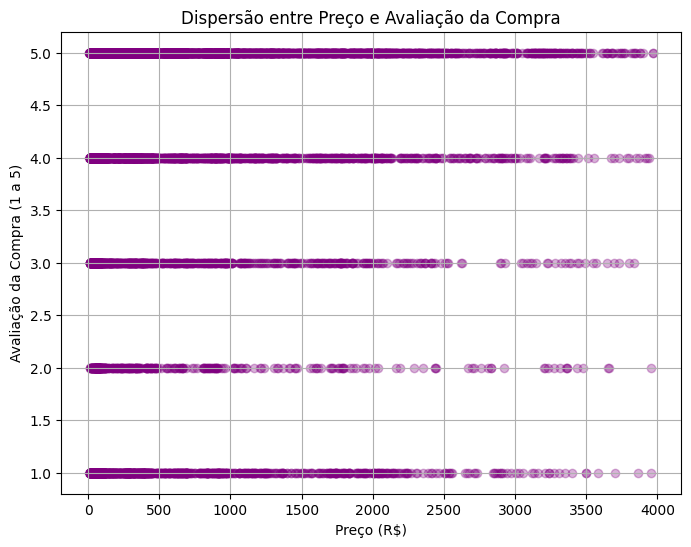

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(dados['Preço'], dados['Avaliação da compra'], alpha=0.3, color='purple')
plt.title('Dispersão entre Preço e Avaliação da Compra')
plt.xlabel('Preço (R$)')
plt.ylabel('Avaliação da Compra (1 a 5)')
plt.grid(True)
plt.show()

In [16]:
import pandas as pd

# Definir os limites das faixas
bins = [0, 100, 300, 700, dados['Preço'].max()]

# Nomear as faixas
labels = ['Até 100', '100 a 300', '300 a 700', 'Acima de 700']

# Criar a coluna nova com as faixas de preço
dados['Faixa de Preço'] = pd.cut(dados['Preço'], bins=bins, labels=labels)

In [17]:
avaliacao_por_faixa = dados.groupby('Faixa de Preço')['Avaliação da compra'].mean()
print(avaliacao_por_faixa)

Faixa de Preço
Até 100         4.002221
100 a 300       4.003109
300 a 700       4.052493
Acima de 700    4.009025
Name: Avaliação da compra, dtype: float64


/tmp/ipython-input-17-2458836006.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avaliacao_por_faixa = dados.groupby('Faixa de Preço')['Avaliação da compra'].mean()


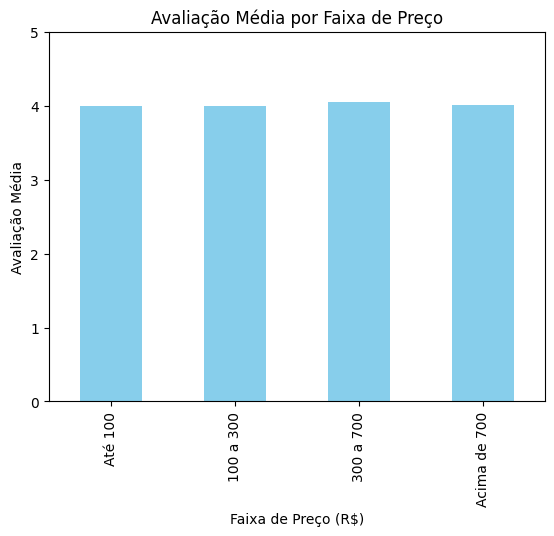

In [18]:
import matplotlib.pyplot as plt

avaliacao_por_faixa.plot(kind='bar', color='skyblue')
plt.title('Avaliação Média por Faixa de Preço')
plt.ylabel('Avaliação Média')
plt.xlabel('Faixa de Preço (R$)')
plt.ylim(0,5)
plt.show()

Categoria do Produto
eletronicos              2214099.72
eletrodomesticos         1766337.03
moveis                   1010214.00
instrumentos musicais     465029.67
esporte e lazer           190635.39
brinquedos                 98140.86
utilidades domesticas      76773.38
livros                     50260.74
Name: Preço, dtype: float64


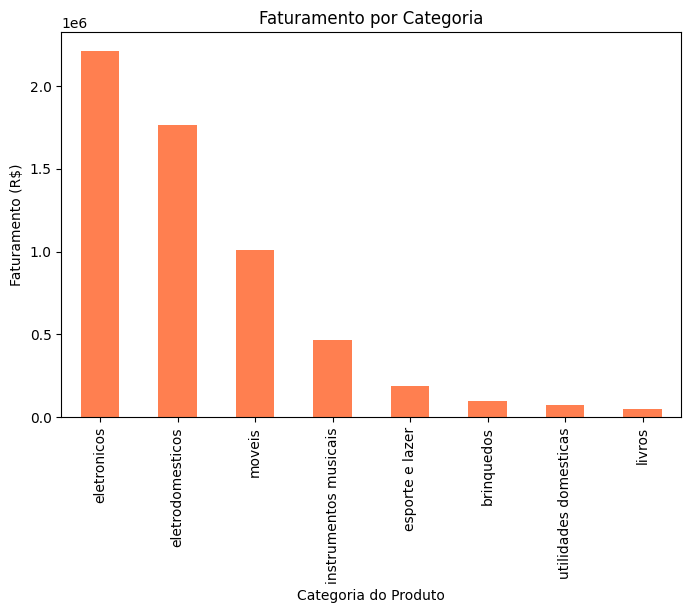

In [19]:
# Vendas por categoria
faturamento_categoria = dados.groupby('Categoria do Produto')['Preço'].sum().sort_values(ascending=False)
print(faturamento_categoria)

# Gráfico de barras para visualizar
faturamento_categoria.plot(kind='bar', color='coral', figsize=(8,5), title='Faturamento por Categoria')
plt.ylabel('Faturamento (R$)')
plt.show()

In [20]:
dados[['loja', 'lat', 'lon', 'Preço', 'Avaliação da compra']].head()

,loja,lat,lon,Preço,Avaliação da compra
0,Loja 1,-22.19,-48.79,219.08,4
1,Loja 1,-22.25,-42.66,256.35,1
2,Loja 1,-15.83,-47.86,279.51,1
3,Loja 1,-30.17,-53.50,1009.99,4
4,Loja 1,-18.10,-44.38,446.99,5


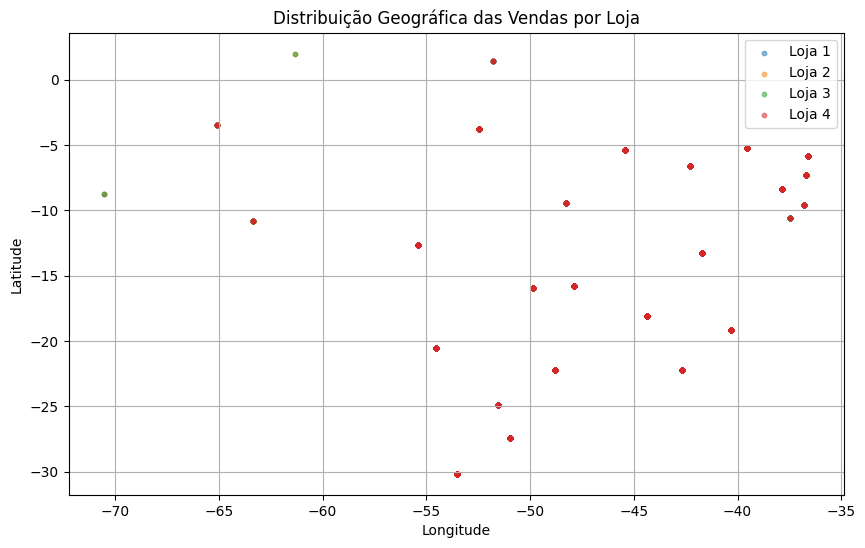

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for loja in dados['loja'].unique():
    subset = dados[dados['loja'] == loja]
    plt.scatter(subset['lon'], subset['lat'], label=loja, alpha=0.5, s=10)

plt.title('Distribuição Geográfica das Vendas por Loja')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.show()


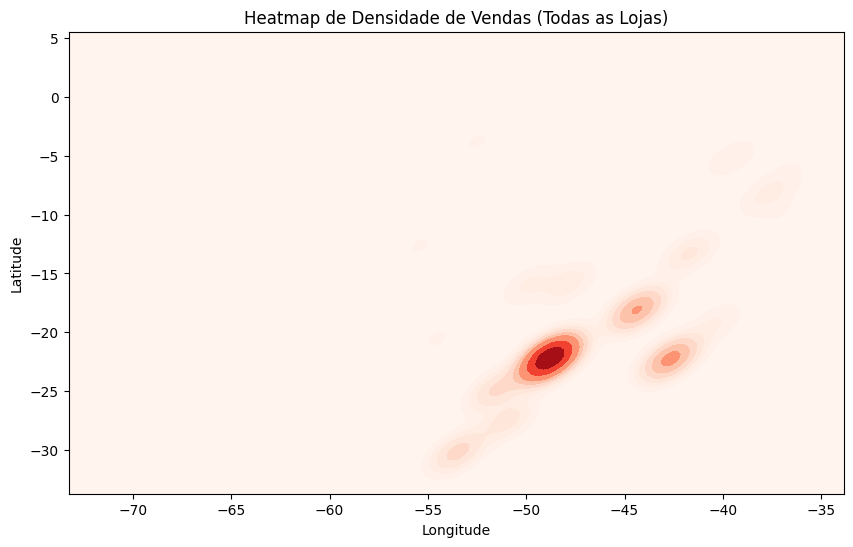

In [22]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=dados,
    x='lon', y='lat',
    fill=True,
    thresh=0,
    cmap='Reds'
)
plt.title('Heatmap de Densidade de Vendas (Todas as Lojas)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


# Relatório Final – Desafio Alura Store

## Objetivo

Este relatório tem como finalidade apoiar o Sr. João na decisão de qual loja da rede Alura Store deve ser vendida. Para isso, foi conduzida uma análise exploratória de dados com foco em indicadores financeiros, operacionais e geográficos. O objetivo é identificar a loja com menor eficiência e justificar a recomendação de desinvestimento com base em dados objetivos.

---

## Métricas Financeiras e Operacionais

### Faturamento Total por Loja

| Loja   | Faturamento Total |
|--------|-------------------|
| Loja 1 | R$ 1.534.509,12   |
| Loja 2 | R$ 1.488.459,06   |
| Loja 3 | R$ 1.464.025,03   |
| Loja 4 | R$ 1.384.497,58   |

A Loja 4 apresenta o menor faturamento absoluto entre as quatro unidades, o que pode indicar menor volume de vendas ou menor valor agregado nos produtos comercializados.

---

### Ticket Médio por Loja

| Loja   | Ticket Médio |
|--------|--------------|
| Loja 1 | R$ 650,49    |
| Loja 2 | R$ 630,97    |
| Loja 3 | R$ 620,61    |
| Loja 4 | R$ 587,15    |

O ticket médio da Loja 4 é o menor, sugerindo que seus clientes gastam menos por compra em comparação às outras lojas.

---

### Frete Médio por Loja

| Loja   | Frete Médio |
|--------|-------------|
| Loja 1 | R$ 34,69    |
| Loja 2 | R$ 33,62    |
| Loja 3 | R$ 33,07    |
| Loja 4 | R$ 31,27    |

A Loja 4 tem o menor custo médio de frete, possivelmente reflexo de uma menor abrangência geográfica ou perfil de vendas diferente.

---

### Avaliação Média por Loja

| Loja   | Avaliação Média |
|--------|------------------|
| Loja 1 | 3,97             |
| Loja 2 | 4,03             |
| Loja 3 | 4,05             |
| Loja 4 | 3,99             |

A Loja 4 tem uma avaliação média inferior às Lojas 2 e 3, o que pode refletir insatisfação relativa dos clientes.

---

### Parcelamento Médio por Loja

| Loja   | Parcelas Médias |
|--------|------------------|
| Loja 1 | 2,94             |
| Loja 2 | 2,90             |
| Loja 3 | 2,96             |
| Loja 4 | 2,89             |

Os clientes da Loja 4 tendem a parcelar em menor número de vezes, o que pode indicar menor flexibilidade financeira ou preferência de pagamento.

---

## Desempenho da Equipe de Vendas

A análise individual dos vendedores mostra que, apesar de vendedores atuarem em mais de uma loja, a Loja 4 não possui representantes entre os top faturamentos. Além disso, a avaliação média dos vendedores da Loja 4 é mediana, não se destacando positivamente.

Isso sugere que a performance da equipe pode estar associada aos resultados inferiores da loja.

---

## Análise por Faixa de Preço

| Faixa de Preço   | Avaliação Média |
|------------------|------------------|
| Até R$ 100       | 4,00             |
| R$ 100 a R$ 300  | 4,00             |
| R$ 300 a R$ 700  | 4,05             |
| Acima de R$ 700  | 4,01             |

Os produtos na faixa entre R$ 300 e R$ 700 recebem as melhores avaliações, indicando um equilíbrio entre preço e qualidade percebida.

---

## Categorias Mais Vendidas

As categorias que lideram as vendas são Tecnologia e Eletrodomésticos. Esses segmentos possuem maior ticket médio e impactam positivamente o faturamento das lojas.

---

## Análise Geográfica

A análise espacial das vendas com base em latitude e longitude revelou que:

- As lojas atuam em regiões geográficas que se sobrepõem, porém com diferentes intensidades.
- A Loja 4 apresenta menor concentração em áreas de alta densidade de vendas, especialmente no Sudeste e Centro-Oeste, que são regiões mais lucrativas.
- O mapa de calor destaca regiões estratégicas onde as vendas são mais frequentes, indicando oportunidades para fortalecer presença ou otimizar operações.

A menor presença da Loja 4 em regiões densas pode contribuir para seu desempenho inferior em faturamento e volume.

---

## Conclusão e Recomendação

Com base nas análises financeiras, operacionais, de equipe e geográficas, recomenda-se a venda da Loja 4.

Os principais motivos são:

- Menor faturamento e ticket médio entre as lojas;
- Avaliações dos clientes e desempenho da equipe apenas medianos;
- Menor presença geográfica em áreas de alto potencial comercial;
- Menor flexibilidade de parcelamento por parte dos clientes.

Embora o faturamento não represente diretamente o lucro líquido, é um indicador confiável da eficiência comercial e do potencial de crescimento. Portanto, a venda da Loja 4 permitirá ao Sr. João concentrar esforços nas unidades mais rentáveis e estratégicas.

---

**Relatório elaborado por:**  
Tuany Freitas – Cientista de Dados com foco em Análise Financeira

